In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
x=np.linspace(-5.0,5.0,100)
y=np.sqrt(100**2 - x**2)
x=np.hstack([x,-x])
y=np.hstack([y,-y])

In [4]:
x1=np.linspace(-5.0,5.0,100)
y1=np.sqrt(5**2 - x1**2)
x1=np.hstack([x1,-x1])
y1=np.hstack([y1,-y1])

- **Support Vector Regression (SVR)** with a **linear kernel** works well when the data is **linearly separable** or follows a **linear trend**.
- Unlike traditional **linear regression**, SVR aims to fit a function that keeps most data points within an **epsilon margin**, allowing some flexibility for outliers.
- If the data is **not linearly separable**, a linear kernel struggles to model the pattern correctly.


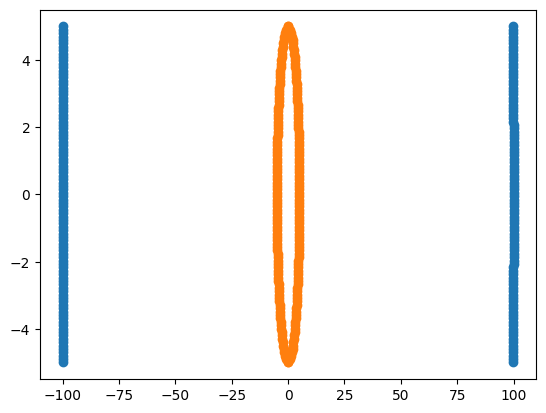

In [5]:
plt.scatter(y,x)
plt.scatter(y1,x1)


In [6]:
np.vstack([y,x]).T

array([[ 9.98749218e+01, -5.00000000e+00],
       [ 9.98799274e+01, -4.89898990e+00],
       [ 9.98848306e+01, -4.79797980e+00],
       [ 9.98896315e+01, -4.69696970e+00],
       [ 9.98943299e+01, -4.59595960e+00],
       [ 9.98989261e+01, -4.49494949e+00],
       [ 9.99034198e+01, -4.39393939e+00],
       [ 9.99078113e+01, -4.29292929e+00],
       [ 9.99121004e+01, -4.19191919e+00],
       [ 9.99162873e+01, -4.09090909e+00],
       [ 9.99203718e+01, -3.98989899e+00],
       [ 9.99243541e+01, -3.88888889e+00],
       [ 9.99282341e+01, -3.78787879e+00],
       [ 9.99320119e+01, -3.68686869e+00],
       [ 9.99356874e+01, -3.58585859e+00],
       [ 9.99392607e+01, -3.48484848e+00],
       [ 9.99427318e+01, -3.38383838e+00],
       [ 9.99461007e+01, -3.28282828e+00],
       [ 9.99493673e+01, -3.18181818e+00],
       [ 9.99525318e+01, -3.08080808e+00],
       [ 9.99555942e+01, -2.97979798e+00],
       [ 9.99585543e+01, -2.87878788e+00],
       [ 9.99614123e+01, -2.77777778e+00],
       [ 9.

In [8]:
import pandas as pd
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = pd.concat([df1, df2], ignore_index=True) # Use pd.concat instead of append
df.head(5)

,X1,X2,Y
0,99.874922,-5.00000,0
1,99.879927,-4.89899,0
2,99.884831,-4.79798,0
3,99.889631,-4.69697,0
4,99.894330,-4.59596,0


In [9]:
df.tail()

,X1,X2,Y
395,-1.969049,-4.59596,1
396,-1.714198,-4.69697,1
397,-1.406908,-4.79798,1
398,-0.999949,-4.89899,1
399,-0.000000,-5.00000,1


In [10]:
### Independent and Dependent features
X = df.iloc[:, :2]
y = df.Y

In [11]:
## Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [12]:
y_train

,Y
250,1
63,0
312,1
159,0
283,1
...,...
323,1
192,0
117,0
47,0


In [13]:
# We need to find components for the Polynomical Kernel
#X1,X2,X1_square,X2_square,X1*X2
df['X1_Square']= df['X1']**2
df['X2_Square']= df['X2']**2
df['X1*X2'] = (df['X1'] *df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,99.874922,-5.00000,0,9975.000000,25.000000,-499.374609
1,99.879927,-4.89899,0,9975.999898,24.000102,-489.310755
2,99.884831,-4.79798,0,9976.979390,23.020610,-479.245399
3,99.889631,-4.69697,0,9977.938476,22.061524,-469.178572
4,99.894330,-4.59596,0,9978.877155,21.122845,-459.110304


In [14]:
### Independent and Dependent features
X = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y = df['Y']

In [15]:

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 0)

In [16]:
X_train

,X1,X2,X1_Square,X2_Square,X1*X2
250,4.999745,0.050505,24.997449,0.002551,0.252512
63,99.990702,1.363636,9998.140496,1.859504,136.350957
312,-3.263736,3.787879,10.651974,14.348026,-12.362637
159,-99.995396,-0.959596,9999.079176,0.920824,95.955178
283,3.680983,3.383838,13.549638,11.450362,12.455852
...,...,...,...,...,...
323,-4.223140,2.676768,17.834915,7.165085,-11.304366
192,-99.907811,-4.292929,9981.570758,18.429242,428.897170
117,-99.946101,3.282828,9989.223038,10.776962,-328.105886
47,99.999681,-0.252525,9999.936231,0.063769,-25.252445


In [17]:
import plotly.express as px

fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2',
              color='Y')
fig.show()

In [18]:

fig = px.scatter_3d(df, x='X1_Square', y='X1_Square', z='X1*X2',
              color='Y')
fig.show()

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="poly")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="rbf")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="sigmoid")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0